<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/tcc_pesquisa_operacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC:

---
https://github.com/Valdecy/pyDecision

## Inportando bibliotecas

In [1]:
!pip install pyDecision -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from pyDecision.algorithm import electre_iii, ahp_method, topsis_method, promethee_iii

In [17]:
ds = pd.read_excel("/content/dados.xlsx", 0)
ds_list = np.array(ds.iloc[:,2:])

In [18]:
ds

,Alternativas,Notebook,RAM (GB),Armazenamento (GB),Placa de Vídeo (GB),Processador i7 (HZ),Preço (R$)
0,a1,AVELL C62 MOB,8,250,4,2.3,7773
1,a2,Avell A70 HYB,8,250,4,2.3,9138
2,a3,AVELL A70 MOB,32,500,4,2.3,9264
3,a4,AVELL A65 MOB,16,500,6,2.3,15444
4,a5,ASUS M515,8,256,2,3.7,4099
5,a6,Novo Notebook Inspiron 15 3000,8,256,4,2.8,5399
6,a7,Notebook Vostro 3510,8,256,4,2.8,5528
7,a8,Novo Notebook Inspiron 15 3000,8,256,4,2.8,5649
8,a9,Notebook Inspiron 15,8,512,4,3.4,5799
9,a10,Notebook Vostro 5510,16,256,4,3.4,7129


### Electre III


In [34]:
ds_pesos = pd.read_excel("/content/dados.xlsx", 1)
W = np.array(ds_pesos.iloc[ 0: 1,1:])[0].tolist()
Q = np.array(ds_pesos.iloc[ 1: 2,1:])[0].tolist()
P = np.array(ds_pesos.iloc[-2:-1,1:])[0].tolist()
V = np.array(ds_pesos.iloc[-1:  ,1:])[0].tolist()

print(f"w: \n {W}")
print(f"q: \n {Q}")
print(f"p: \n {P}")
print(f"v: \n {V}")

w: 
 [2.7, 1.0, 4.0, 3.5, 2.5]
q: 
 [2.0, 150.0, 1.0, 1.5, 500.0]
p: 
 [4.0, 200.0, 2.0, 2.5, 750.0]
v: 
 [8.0, 400.0, 3.0, 3.0, 1500.0]


#### Encontrando a solução

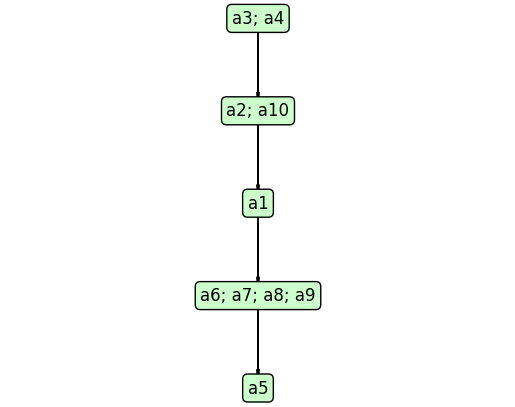

In [35]:
global_concordance, credibility, rank_D, rank_A, rank_N, rank_P = electre_iii(ds_list, P = P, Q = Q, V = V, W = W, graph = True)

In [36]:
rank_D_final = []
rank = []
k = 1
for i in range(0, len(rank_D)):
    splited = list(rank_D[i].split('; '))
    for s in splited:
        rank_D_final.append(s)
        rank.append(k)
    k += 1

resultado = pd.DataFrame()
resultado["Alternativas"] = rank_D_final
resultado["Resultado"] = rank

dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic.join(resultado.set_index("Alternativas"), on = "Alternativas").sort_values("Resultado")

,Notebook,Resultado
Alternativas,,
a3,AVELL A70 MOB,1
a4,AVELL A65 MOB,1
a2,Avell A70 HYB,2
a10,Notebook Vostro 5510,2
a1,AVELL C62 MOB,3
a6,Novo Notebook Inspiron 15 3000,4
a7,Notebook Vostro 3510,4
a8,Novo Notebook Inspiron 15 3000,4
a9,Notebook Inspiron 15,4


### PROMETHEE III


In [37]:
ds_pesos = pd.read_excel("/content/dados.xlsx", 1)
W = np.array(ds_pesos.iloc[ 0: 1,1:])[0].tolist()
Q = np.array(ds_pesos.iloc[ 1: 2,1:])[0].tolist()
P = np.array(ds_pesos.iloc[-2:-1,1:])[0].tolist()
V = np.array(ds_pesos.iloc[-1:  ,1:])[0].tolist()

print(f"w: \n {W}")
print(f"q: \n {Q}")
print(f"p: \n {P}")

w: 
 [2.7, 1.0, 4.0, 3.5, 2.5]
q: 
 [2.0, 150.0, 1.0, 1.5, 500.0]
p: 
 [4.0, 200.0, 2.0, 2.5, 750.0]


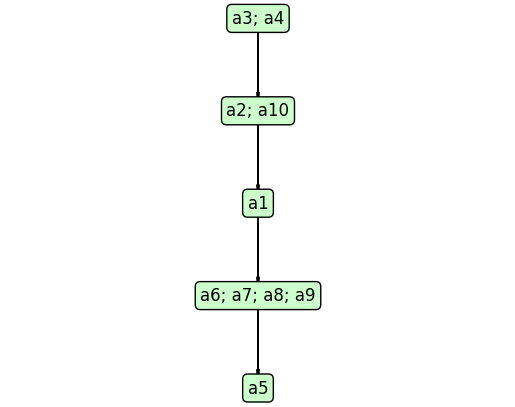

In [38]:
# Call Electre III Function
global_concordance, credibility, rank_D, rank_A, rank_N, rank_P = electre_iii(ds_list, P = P, Q = Q, V = V, W = W, graph = True)

In [44]:
rank_D_final = []
rank = []
k = 1
for i in range(0, len(rank_D)):
    splited = list(rank_D[i].split('; '))
    for s in splited:
        rank_D_final.append(s)
        rank.append(k)
    k += 1

resultado = pd.DataFrame()
resultado["Alternativas"] = rank_D_final
resultado["Resultado"] = rank

dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic.join(resultado.set_index("Alternativas"), on = "Alternativas").sort_values("Resultado")

,Notebook,Resultado
Alternativas,,
a3,AVELL A70 MOB,1
a4,AVELL A65 MOB,1
a2,Avell A70 HYB,2
a10,Notebook Vostro 5510,2
a1,AVELL C62 MOB,3
a6,Novo Notebook Inspiron 15 3000,4
a7,Notebook Vostro 3510,4
a8,Novo Notebook Inspiron 15 3000,4
a9,Notebook Inspiron 15,4


### TOPIS


In [47]:
criterion_type = ['max', 'max', 'max', 'max', 'min']
weights = np.array([ [2.7, 1.0, 4.0, 3.5, 2.5] ])

a1: 0.36
a2: 0.33
a3: 0.64
a4: 0.46
a5: 0.39
a6: 0.42
a7: 0.41
a8: 0.41
a9: 0.43
a10: 0.5


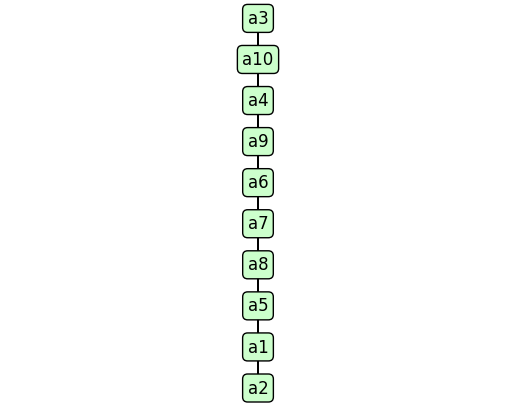

In [52]:
relative_closeness = topsis_method(ds_list, weights, criterion_type, graph = True)

In [72]:
resultado = pd.DataFrame()
resultado["Alternativas"] = rank_D_final
resultado["Resultado"] = relative_closeness

dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic.join(resultado.set_index("Alternativas"), on = "Alternativas").sort_values("Resultado", ascending = True)

,Notebook,Resultado
Alternativas,,
a4,AVELL A65 MOB,0.331118
a3,AVELL A70 MOB,0.359456
a1,AVELL C62 MOB,0.390107
a8,Novo Notebook Inspiron 15 3000,0.412185
a7,Notebook Vostro 3510,0.414383
a6,Novo Notebook Inspiron 15 3000,0.416707
a9,Notebook Inspiron 15,0.434524
a10,Notebook Vostro 5510,0.462147
a5,ASUS M515,0.497931


### AHP


In [122]:
class AHP():

    def __init__(self, metodo, precisao, alternativas, criterios,
                 subCriterios, matrizesPreferencias):
        
        self.metodo = metodo
        self.precisao = precisao
        self.alternativas = alternativas
        self.criterios = criterios
        self.subCriterios = subCriterios
        self.matrizesPreferencias = matrizesPreferencias

        self.prioridadesGlobais = []

    @staticmethod
    def aproximado(matriz, precisao):
        soma_colunas = matriz.sum(axis=0)
        matriz_norm = np.divide(matriz, soma_colunas)
        media_linhas = matriz_norm.mean(axis=1)

        return media_linhas.round(precisao)

    @staticmethod
    def geometrico(matriz, precisao):
        media_geometrica = [np.prod(linha) ** (1 / len(linha)) for linha in matriz]
        media_geometrica_norm = media_geometrica / sum(media_geometrica)

        return media_geometrica_norm.round(precisao)

    @staticmethod
    def autovalor(matriz, precisao, interacao=100, autovetor_anterior=None):
        matriz_quadrada = np.linalg.matrix_power(matriz, 2)
        soma_linhas = np.sum(matriz_quadrada, axis=1)
        soma_coluna = np.sum(soma_linhas, axis=0)
        autovetor_atual = np.divide(soma_linhas, soma_coluna)

        if autovetor_anterior is None:
            autovetor_anterior = np.zeros(matriz.shape[0])

        diferenca = np.subtract(autovetor_atual, autovetor_anterior).round(precisao)
        if not np.any(diferenca):
            return autovetor_atual.round(precisao)

        interacao -= 1
        if interacao > 0:
            return AHP.autovalor(matriz_quadrada, precisao, interacao, autovetor_atual)
        else:
            return autovetor_atual.round(precisao)

    @staticmethod
    def consistencia(matriz):
        if matriz.shape[0] and matriz.shape[1] > 2:
            # Teorema de Perron-Frobenius
            lambda_max = np.real(np.linalg.eigvals(matriz).max())
            ic = (lambda_max - len(matriz)) / (len(matriz) - 1)
            ri = {3: 0.52, 4: 0.89, 5: 1.11, 6: 1.25, 7: 1.35, 8: 1.40, 9: 1.45,
                  10: 1.49, 11: 1.52, 12: 1.54, 13: 1.56, 14: 1.58, 15: 1.59}
            rc = ic / ri[len(matriz)]
        else:
            lambda_max = 0
            ic = 0
            rc = 0

        return lambda_max, ic, rc

    def VetorPrioridadesLocais(self):
        vetor_prioridades_locais = {}
        for criterio in self.matrizesPreferencias:
            matriz = np.array(self.matrizesPreferencias[criterio])
            if self.metodo == 'aproximado':
                prioridades_locais = self.aproximado(matriz, self.precisao)
            elif self.metodo == 'geometrico':
                prioridades_locais = self.geometrico(matriz, self.precisao)
            else:
                if matriz.shape[0] and matriz.shape[1] >= 2:
                    prioridades_locais = self.autovalor(matriz, self.precisao)
                else:
                    prioridades_locais = self.aproximado(matriz, self.precisao)

            vetor_prioridades_locais[criterio] = prioridades_locais

            lambda_max, ic, rc = self.consistencia(matriz)

        return vetor_prioridades_locais

    def VetorPrioridadesGlobais(self, prioridades, pesos, criterios):
        for criterio in criterios:
            peso = pesos[criterios.index(criterio)]
            prioridades_locais = prioridades[criterio]
            prioridade_global = np.round(peso * prioridades_locais, self.precisao)

            if criterio in self.subCriterios:
                self.VetorPrioridadesGlobais(prioridades, prioridade_global, self.subCriterios[criterio])
            else:
                self.prioridadesGlobais.append(prioridade_global)

    def Resultado(self):
        prioridades = self.VetorPrioridadesLocais()
        self.VetorPrioridadesGlobais(prioridades, prioridades[self.criterios[0]], self.criterios)
        prioridades = np.array(self.prioridadesGlobais)
        prioridades = prioridades.sum(axis=0).round(self.precisao)

        return dict(zip(self.alternativas, prioridades))

In [164]:
ahp = AHP(
    metodo='',
    precisao=3,
    alternativas=['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'],
    criterios=['RAM (GB)', 'Armazenamento (GB)', 'Placa de Vídeo (GB)', 'Processador i7 (HZ)', 'Preço (R$)'],
    subCriterios={},
    matrizesPreferencias={
        'RAM (GB)': [
            [1, 1 / 2, 1 / 2, 1 / 2, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 4],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [4, 3, 3, 3, 2, 2, 2, 2, 2, 1]
        ],
        'Armazenamento (GB)': [
            [1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [2, 1, 1, 1, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 2, 2, 2, 2, 2, 1]
        ],
        'Placa de Vídeo (GB)': [
            [1, 1 / 4, 1 / 4, 1 / 6, 1 / 4, 1 / 4, 1 / 4, 1 / 4, 1 / 4, 1 / 4],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [6, 2, 2, 1, 2, 2, 2, 2, 2, 2],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1],
            [4, 1, 1, 1 / 2, 1, 1, 1, 1, 1, 1]
        ],
        'Processador i7 (HZ)': [
            [1, 1 / 2, 1 / 2, 1 / 2, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 4],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 1, 1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [3, 2, 2, 2, 1, 1, 1, 1, 1, 1 / 2],
            [4, 3, 3, 3, 2, 2, 2, 2, 2, 1]
        ],
        'Preço (R$)': [
            [1, 1 / 3, 1 / 3, 1 / 4, 1 / 3, 1 / 2, 1 / 2, 1 / 2, 1 / 2, 1 / 5],
            [3, 1, 1, 1 / 2, 1, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 6],
            [3, 1, 1, 1 / 2, 1, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 6],
            [4, 2, 2, 3, 2, 1, 1, 1, 1, 1 / 4],
            [3, 1, 1, 1 / 2, 1, 1 / 3, 1 / 3, 1 / 3, 1 / 3, 1 / 6],
            [2, 3, 3, 4, 3, 1, 1, 1, 1, 1 / 7],
            [2, 3, 3, 4, 3, 1, 1, 1, 1, 1 / 7],
            [2, 3, 3, 4, 3, 1, 1, 1, 1, 1 / 7],
            [2, 3, 3, 4, 3, 1, 1, 1, 1, 1 / 7],
            [5, 6, 6, 7, 6, 7, 7, 7, 7, 1]
        ]
    })

In [165]:
ahp.VetorPrioridadesLocais()

{'RAM (GB)': array([0.037, 0.061, 0.061, 0.061, 0.115, 0.115, 0.115, 0.115, 0.115,
        0.204]),
 'Armazenamento (GB)': array([0.049, 0.096, 0.096, 0.096, 0.096, 0.096, 0.096, 0.096, 0.096,
        0.186]),
 'Placa de Vídeo (GB)': array([0.025, 0.098, 0.098, 0.191, 0.098, 0.098, 0.098, 0.098, 0.098,
        0.098]),
 'Processador i7 (HZ)': array([0.037, 0.061, 0.061, 0.061, 0.115, 0.115, 0.115, 0.115, 0.115,
        0.204]),
 'Preço (R$)': array([0.03 , 0.036, 0.036, 0.09 , 0.036, 0.099, 0.099, 0.099, 0.099,
        0.377])}

In [166]:
resultado = ahp.Resultado()

In [167]:
resultados = pd.DataFrame()
resultados["Alternativas"] = resultado.keys()
resultados["Resultado"] = resultado.values()

dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic.join(resultados.set_index("Alternativas"), on = "Alternativas").sort_values("Resultado", ascending = True)

,Notebook,Resultado
Alternativas,,
a1,AVELL C62 MOB,0.011
a2,Avell A70 HYB,0.022
a3,AVELL A70 MOB,0.022
a5,ASUS M515,0.027
a4,AVELL A65 MOB,0.034
a6,Novo Notebook Inspiron 15 3000,0.034
a7,Notebook Vostro 3510,0.034
a8,Novo Notebook Inspiron 15 3000,0.034
a9,Notebook Inspiron 15,0.034
